In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
train = pd.read_csv("D:\TECHNOLABS\9961_14084_bundle_archive\Train.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.shape

(8523, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [7]:
#2 columns, Item_Weight and Outlet_Size have missing values.

In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
#Visualizing the distribution of the variables

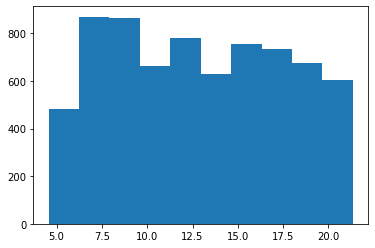

In [10]:
# Item_Weight
plt.hist(train['Item_Weight'])
plt.show()

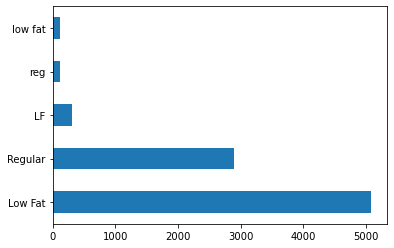

In [11]:
# Item_Fat_Content
train['Item_Fat_Content'].value_counts().plot(kind='barh')
plt.show()

# The values in this column have to be cleaned. "reg" refers to Regular, "low fat" & "LF" refer to Low Fat.

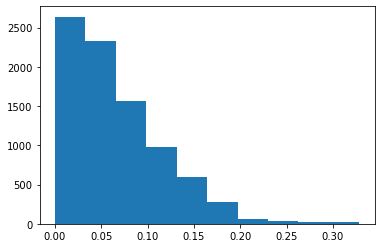

In [12]:
# Item_Visibility
plt.hist(train['Item_Visibility'])
plt.show()

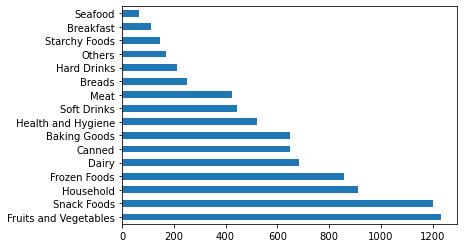

In [13]:
# Item_Type
train['Item_Type'].value_counts().plot(kind='barh')
plt.show()

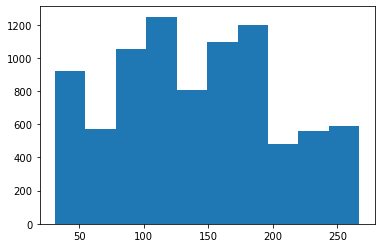

In [14]:
# Item_MRP
plt.hist(train['Item_MRP'])
plt.show()

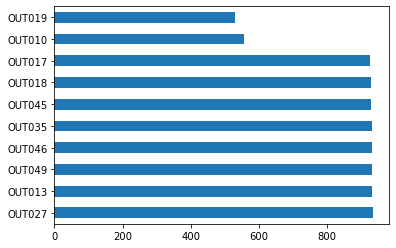

In [15]:
# Outlet_Identifier
train['Outlet_Identifier'].value_counts().plot(kind='barh')
plt.show()

<AxesSubplot:>

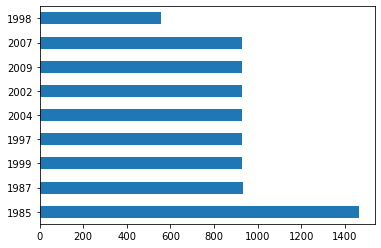

In [16]:
# Outlet_Establishment_Year
train['Outlet_Establishment_Year'].value_counts().plot(kind='barh')

<AxesSubplot:>

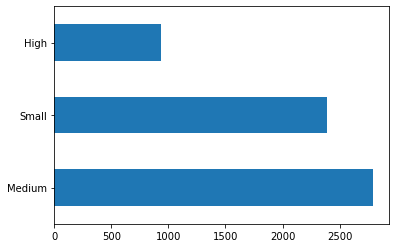

In [17]:
# Outlet_Size
train['Outlet_Size'].value_counts().plot(kind='barh')

<AxesSubplot:>

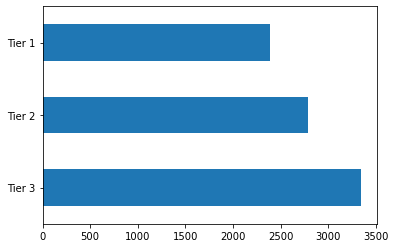

In [19]:
# Outlet_Location_Type
train['Outlet_Location_Type'].value_counts().plot(kind='barh')

<AxesSubplot:>

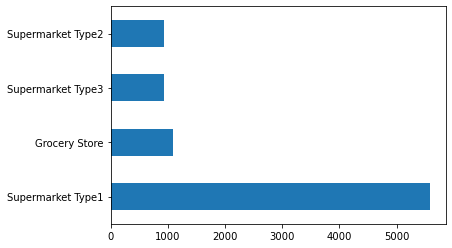

In [20]:
# Outlet_Type
train['Outlet_Type'].value_counts().plot(kind='barh')

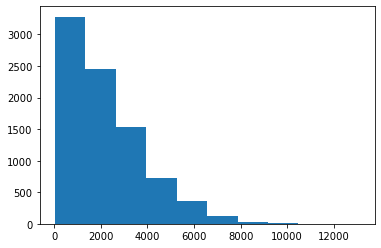

In [21]:
# Item_Outlet_Sales
plt.hist(train['Item_Outlet_Sales'])
plt.show()

In [22]:
#Missing Values and Data Cleaning
#There are 3 columns to be cleaned: Item_Weight, Item_Fat_Content, and Outlet_Size.

In [23]:
#Item_Fat_Content

In [24]:
# Item_Fat_Content

train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [25]:
# Creating a Pandas Series object with NA values to fill.
Fat_Content = train['Item_Fat_Content']
print(Fat_Content)

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object


In [26]:
# Filling up the NA values in the Pandas Series object and assigning it back to the Data Frame.
for i in range(0,len(Fat_Content)):
    if Fat_Content[i] == 'LF':
        Fat_Content[i] = 'Low Fat'
    elif Fat_Content[i] == 'low fat':
        Fat_Content[i] = 'Low Fat'
    elif Fat_Content[i] == 'reg':
        Fat_Content[i] = 'Regular'
    else:
        Fat_Content[i] = Fat_Content[i]

C:\Users\Asus\AppData\Local\Temp\ipykernel_11664\2997178701.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fat_Content[i] = Fat_Content[i]
C:\Users\Asus\AppData\Local\Temp\ipykernel_11664\2997178701.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fat_Content[i] = 'Low Fat'
C:\Users\Asus\AppData\Local\Temp\ipykernel_11664\2997178701.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fat_Content[i] = 'Low Fat'
C:\Users\Asus\Ap

In [27]:
Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [28]:
train['Item_Fat_Content'] = Fat_Content
print(train['Item_Fat_Content'].unique())

# The Item_Fat_Content column in train DF only contains valid values.

['Low Fat' 'Regular']


In [29]:
#Item_Weight

In [30]:
train[train.Item_Weight.isnull() == False].loc[:,['Item_Identifier', 'Item_Weight']]
# Removing NA rows and selecting the 2 columns. Making sure only NA rows in Item_Weight column are dropped.

,Item_Identifier,Item_Weight
0,FDA15,9.300
1,DRC01,5.920
2,FDN15,17.500
3,FDX07,19.200
4,NCD19,8.930
...,...,...
8518,FDF22,6.865
8519,FDS36,8.380
8520,NCJ29,10.600
8521,FDN46,7.210


In [31]:
mapping = dict(train[train.Item_Weight.isnull() == False].loc[:,['Item_Identifier', 'Item_Weight']].values)
# Creating a dictionary for mapping

In [32]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Identifier'].map(mapping))
# Replacing NA values with values from the mapping dictionary

In [33]:
train[train.Item_Weight.isna() == True]
# Rows which do not have any other non-NA rows with the same product.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [34]:
# Filling the missing values with median Item_Weight.
med_wt = np.nanmedian(train['Item_Weight'])

train['Item_Weight'] = train['Item_Weight'].fillna(med_wt)

In [35]:
train.Item_Weight.isna().sum()
# No more missing values in Item_Weight.

0

In [36]:
#Outlet_Size

In [37]:
train.Outlet_Size.isna().sum()

2410

In [38]:
# Identifying unique Outlets with missing Outlet Sizes
train[train.Outlet_Size.isnull() == True].Outlet_Identifier.unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [39]:
# Going through the data, OUT017 and OUT045 have Outlet Locations as Tier 2 and Outlet Types as Supermarket Type 1.
# Most other outlets with similar Location and Supermarket Types have Outlet Size as Small.
# Using that, Outlet Size for OUT017 and OUT045 will be filled as 'Small'.

# OUT010 has Outlet Type as Grocery. Grocery Stores type have Outlet Size Small in the data.
# Using that, Outlet Size for OUT101 will be filled as Small.

# All 3 unique outlets with missing Outlet Sizes will be filled as Small.

In [40]:
train['Outlet_Size'] = train['Outlet_Size'].fillna("Small")

In [41]:
train.Outlet_Size.isna().sum()
# No more missing values in Outlet_Size.

0

In [42]:
#Data Pre-Processing

In [43]:
#Item_Identifier and Outlet_Identifier

# Item_Indicator and Outlet_Indicator are unique ID numbers of Products and Outlets. To convert it to numeric, the
# respective frequencies of every product/outlet are added to the train data. For ex, if OUT010 has 600 counts in the
# entire data frame, 600 will be input to every cell that has the value OUT010 in the Outlet_Indicator column.

col = ['Item_Identifier', 'Outlet_Identifier']

for i in col:
    x = dict(train[i].value_counts())
    train[i] = train[i].map(x)

In [44]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,8,9.30,Low Fat,0.016047,Dairy,249.8092,930,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,6,5.92,Regular,0.019278,Soft Drinks,48.2692,928,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,7,17.50,Low Fat,0.016760,Meat,141.6180,930,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,6,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,555,1998,Small,Tier 3,Grocery Store,732.3800
4,6,8.93,Low Fat,0.000000,Household,53.8614,932,1987,High,Tier 3,Supermarket Type1,994.7052


In [45]:
# Item_Fat_Content and Item_Type

# These 2 categorical variables are nominal.
# Using label encoding, the variables will be converted into numeric.

from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
train['Item_Fat_Content'] = le1.fit_transform(train['Item_Fat_Content'])

le2 = preprocessing.LabelEncoder()
train['Item_Type'] = le2.fit_transform(train['Item_Type'])

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,8,9.30,0,0.016047,4,249.8092,930,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,6,5.92,1,0.019278,14,48.2692,928,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,7,17.50,0,0.016760,10,141.6180,930,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,6,19.20,1,0.000000,6,182.0950,555,1998,Small,Tier 3,Grocery Store,732.3800
4,6,8.93,0,0.000000,9,53.8614,932,1987,High,Tier 3,Supermarket Type1,994.7052


In [46]:
# Outlet_Size, Outlet_Location_Type and Outlet_Type

# These 3 are ordinal categorical variables as each value has a specific order (Small < Medium < High, etc.).
# The respective values in each column will be replaced by an integer.

# Outlet_Size -- Small = 1, Medium = 2, High = 3.

train['Outlet_Size'] = train['Outlet_Size'].replace("Small", 1)
train['Outlet_Size'] = train['Outlet_Size'].replace("Medium", 2)
train['Outlet_Size'] = train['Outlet_Size'].replace("High", 3)

#Outlet_Location_Type -- Tier1 = 3, Tier2 = 2, Tier3 = 1 (Tier1 has more points than Tier3)
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].replace("Tier 1", 3)
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].replace("Tier 2", 2)
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].replace("Tier 3", 1)

# Outlet_Type -- Grocery Store = 1, Supermarket Type3 = 2, Supermarket Type2 = 3, Supermarket Type1 = 4.
train['Outlet_Type'] = train['Outlet_Type'].replace("Grocery Store", 1)
train['Outlet_Type'] = train['Outlet_Type'].replace("Supermarket Type3", 2)
train['Outlet_Type'] = train['Outlet_Type'].replace("Supermarket Type2", 3)
train['Outlet_Type'] = train['Outlet_Type'].replace("Supermarket Type1", 4)

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,8,9.30,0,0.016047,4,249.8092,930,1999,2,3,4,3735.1380
1,6,5.92,1,0.019278,14,48.2692,928,2009,2,1,3,443.4228
2,7,17.50,0,0.016760,10,141.6180,930,1999,2,3,4,2097.2700
3,6,19.20,1,0.000000,6,182.0950,555,1998,1,1,1,732.3800
4,6,8.93,0,0.000000,9,53.8614,932,1987,3,1,4,994.7052


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(2), int64(6)
memory usage: 732.6 KB


In [48]:
#all are numerical now
#Multi-Collinearity Check amongst Predictor Variables

<AxesSubplot:>

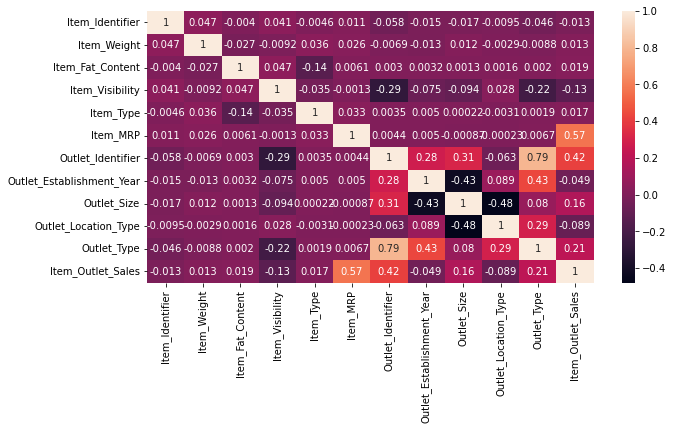

In [49]:
plt.figure(figsize = (10,5))
sns.heatmap(train.corr(), annot=True)

In [50]:
train_clean = train.drop(['Outlet_Size','Outlet_Type'], axis=1)
train_clean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales
0,8,9.30,0,0.016047,4,249.8092,930,1999,3,3735.1380
1,6,5.92,1,0.019278,14,48.2692,928,2009,1,443.4228
2,7,17.50,0,0.016760,10,141.6180,930,1999,3,2097.2700
3,6,19.20,1,0.000000,6,182.0950,555,1998,1,732.3800
4,6,8.93,0,0.000000,9,53.8614,932,1987,1,994.7052


<AxesSubplot:>

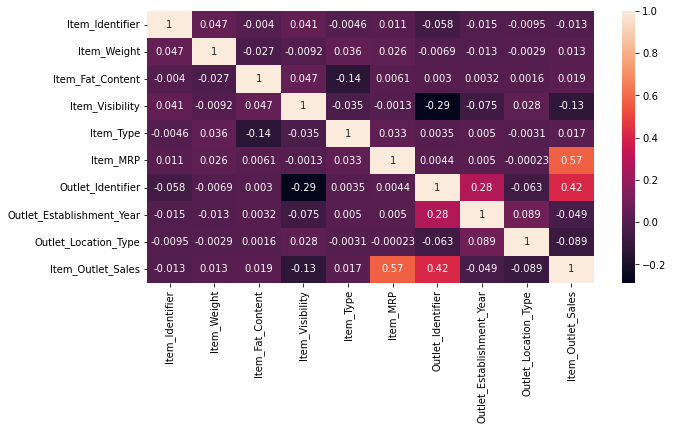

In [51]:
plt.figure(figsize = (10,5))
sns.heatmap(train_clean.corr(), annot=True)

In [52]:
print(train_clean.shape)

(8523, 10)


In [53]:
#Splitting Train data into 80% training data and 20% validation data.

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_clean[train_clean.columns[0:9]], train_clean[train_clean.columns[9]], test_size=0.2)

In [55]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

y_test.head()

(6818, 9)
(6818,)
(1705, 9)
(1705,)


7991    2833.6448
6316    3448.8440
3609     209.7270
4850    3585.3330
4770     253.0040
Name: Item_Outlet_Sales, dtype: float64

In [56]:
#Building the Linear Regression Model

In [57]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() 
lm.fit(X_train, y_train) 
pred = lm.predict(X_test) 

In [58]:
# R-squared value of the model
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.5088633962778865

In [59]:
import statsmodels.regression.linear_model as sm

In [60]:
X_opt = X_train
ols = sm.OLS(endog = y_train, exog = X_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                              3262.
Date:                Sat, 08 Apr 2023   Prob (F-statistic):                        0.00
Time:                        15:31:08   Log-Likelihood:                         -58022.
No. Observations:                6818   AIC:                                  1.161e+05
Df Residuals:                    6809   BIC:                                  1.161e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Item_Identifier               3.9425     10.162      0.388      0.698     -15.978      23.863
Item_Weight                   1.9358      3.140      0.616      0.538      -4.220       8.091
Item_Fat_Content             34.1821     30.876      1.107      0.268     -26.345      94.709
Item_Visibility            -294.7904    297.441     -0.991      0.322    -877.868     288.287
Item_Type                    -1.0864      3.516     -0.309      0.757      -7.980       5.807
Item_MRP                     15.6382      0.234     66.722      0.000      15.179      16.098
Outlet_Identifier             5.4516      0.119     46.004      0.000       5.219       5.684
Outlet_Establishment_Year    -2.3199      0.074    -31.499      0.000      -2.464      -2.176
Outlet_Location_Type       -118.4705     17.919     -6.611      0.000    -153.597     -83.344
==============================================================================
Omnibus:                     1080.711   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2897.861
Skew:                           0.864   Prob(JB):                         0.00
Kurtosis:                       5.686   Cond. No.                     4.47e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
# Removing Item_Type with highest p-value:
X_opt = X_train.drop(['Item_Type'],axis=1)
ols2 = sm.OLS(endog = y_train, exog = X_opt).fit()
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              3670.
Date:                Sat, 08 Apr 2023   Prob (F-statistic):                        0.00
Time:                        15:31:20   Log-Likelihood:                         -58022.
No. Observations:                6818   AIC:                                  1.161e+05
Df Residuals:                    6810   BIC:                                  1.161e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Item_Identifier               3.9631     10.161      0.390      0.697     -15.956      23.882
Item_Weight                   1.9090      3.139      0.608      0.543      -4.244       8.062
Item_Fat_Content             35.5022     30.577      1.161      0.246     -24.439      95.443
Item_Visibility            -292.7882    297.351     -0.985      0.325    -875.689     290.112
Item_MRP                     15.6360      0.234     66.747      0.000      15.177      16.095
Outlet_Identifier             5.4516      0.118     46.007      0.000       5.219       5.684
Outlet_Establishment_Year    -2.3240      0.072    -32.059      0.000      -2.466      -2.182
Outlet_Location_Type       -118.4279     17.917     -6.610      0.000    -153.551     -83.304
==============================================================================
Omnibus:                     1080.671   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2897.313
Skew:                           0.864   Prob(JB):                         0.00
Kurtosis:                       5.686   Cond. No.                     4.47e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
# Removing Item_Type & Item_Identifier with highest p-value:
X_opt = X_train.drop(['Item_Type', 'Item_Identifier'],axis=1)
ols3 = sm.OLS(endog = y_train, exog = X_opt).fit()
ols3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              4195.
Date:                Sat, 08 Apr 2023   Prob (F-statistic):                        0.00
Time:                        15:31:29   Log-Likelihood:                         -58022.
No. Observations:                6818   AIC:                                  1.161e+05
Df Residuals:                    6811   BIC:                                  1.161e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Item_Weight                   1.9637      3.135      0.626      0.531      -4.183       8.110
Item_Fat_Content             35.4831     30.575      1.161      0.246     -24.454      95.420
Item_Visibility            -289.9436    297.243     -0.975      0.329    -872.633     292.745
Item_MRP                     15.6369      0.234     66.757      0.000      15.178      16.096
Outlet_Identifier             5.4493      0.118     46.050      0.000       5.217       5.681
Outlet_Establishment_Year    -2.3116      0.065    -35.425      0.000      -2.440      -2.184
Outlet_Location_Type       -118.5329     17.914     -6.617      0.000    -153.650     -83.415
==============================================================================
Omnibus:                     1081.119   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2899.819
Skew:                           0.864   Prob(JB):                         0.00
Kurtosis:                       5.687   Cond. No.                     4.47e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
# Removing Item_Type, Item_Identifier, and Item_Weight with highest p-value:
X_opt = X_train.drop(['Item_Type', 'Item_Identifier', 'Item_Weight'],axis=1)
ols4 = sm.OLS(endog = y_train, exog = X_opt).fit()
ols4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              4895.
Date:                Sat, 08 Apr 2023   Prob (F-statistic):                        0.00
Time:                        15:31:40   Log-Likelihood:                         -58022.
No. Observations:                6818   AIC:                                  1.161e+05
Df Residuals:                    6812   BIC:                                  1.161e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Item_Fat_Content             35.1750     30.570      1.151      0.250     -24.752      95.102
Item_Visibility            -291.9157    297.213     -0.982      0.326    -874.546     290.715
Item_MRP                     15.6404      0.234     66.795      0.000      15.181      16.099
Outlet_Identifier             5.4487      0.118     46.048      0.000       5.217       5.681
Outlet_Establishment_Year    -2.2988      0.062    -37.110      0.000      -2.420      -2.177
Outlet_Location_Type       -118.6205     17.913     -6.622      0.000    -153.735     -83.506
==============================================================================
Omnibus:                     1082.541   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2908.877
Skew:                           0.864   Prob(JB):                         0.00
Kurtosis:                       5.693   Cond. No.                     4.47e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
# Removing Item_Type, Item_Identifier, Item_Weight, Item_Visibility with highest p-value:
X_opt = X_train.drop(['Item_Type', 'Item_Identifier', 'Item_Weight', 'Item_Visibility'],axis=1)
ols5 = sm.OLS(endog = y_train, exog = X_opt).fit()
ols5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              5874.
Date:                Sat, 08 Apr 2023   Prob (F-statistic):                        0.00
Time:                        15:31:49   Log-Likelihood:                         -58022.
No. Observations:                6818   AIC:                                  1.161e+05
Df Residuals:                    6813   BIC:                                  1.161e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Item_Fat_Content             33.3731     30.515      1.094      0.274     -26.445      93.191
Item_MRP                     15.6396      0.234     66.792      0.000      15.181      16.099
Outlet_Identifier             5.4816      0.113     48.304      0.000       5.259       5.704
Outlet_Establishment_Year    -2.3224      0.057    -40.660      0.000      -2.434      -2.210
Outlet_Location_Type       -118.8855     17.911     -6.638      0.000    -153.996     -83.775
==============================================================================
Omnibus:                     1083.832   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2915.372
Skew:                           0.865   Prob(JB):                         0.00
Kurtosis:                       5.696   Cond. No.                     4.59e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
# Removing Item_Type, Item_Identifier, Item_Weight, Item_Visibility, Item_Fat_Content with highest p-value:
X_opt = X_train.drop(['Item_Type', 'Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Fat_Content'],axis=1)
ols6 = sm.OLS(endog = y_train, exog = X_opt).fit()
ols6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              7342.
Date:                Sat, 08 Apr 2023   Prob (F-statistic):                        0.00
Time:                        15:32:01   Log-Likelihood:                         -58023.
No. Observations:                6818   AIC:                                  1.161e+05
Df Residuals:                    6814   BIC:                                  1.161e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Item_MRP                     15.6405      0.234     66.796      0.000      15.182      16.100
Outlet_Identifier             5.4811      0.113     48.299      0.000       5.259       5.704
Outlet_Establishment_Year    -2.3163      0.057    -40.743      0.000      -2.428      -2.205
Outlet_Location_Type       -118.8648     17.911     -6.636      0.000    -153.976     -83.754
==============================================================================
Omnibus:                     1080.874   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2901.825
Skew:                           0.863   Prob(JB):                         0.00
Kurtosis:                       5.689   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
X_opt = X_test.drop(['Item_Type', 'Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Fat_Content'],axis=1)
y_pred = ols6.predict(X_opt)

In [68]:
#Calculating RMSE

In [67]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_test, y_pred))

1227.593684765857

In [69]:
import statistics
print(statistics.mean(train.Item_Outlet_Sales))

2181.2889135750324


In [70]:
#The mean value of Item_Outlet_Sales was about 2181.29.